<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/CodeExamples/locationLocationLocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# for PUI - DSPS - MLPNS demo of One Hot Encoded usage in RF

In [ ]:
!pip install geopandas

In [ ]:
!brew install graphviz


/bin/bash: brew: command not found


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy  as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import ensemble
from sklearn import metrics
from sklearn import tree
import graphviz
import pylab as pl
pl.rcParams["font.size"] = 18
pl.rcParams["figure.figsize"] = (10,10)
%pylab inline

/bin/bash: brew: command not found
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['indices', 'f', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## reading in data

I used [this code](https://github.com/ChrisMuir/Zillow) but Chris Muir to download Zillow details for properties in zipcodes starting with 10 and 11 (it was a lot of fun, it uses Selene to open a chrome window and runs it under your eyes. You can interact with it, so you can show you are not a robot, although the code running the window is. Notice that scraping Zillow is against Zillow's policy

read in zillow data

In [ ]:
nychouses = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/allzips.csv")

In [ ]:
nychouses.head()

,zip,price,sqft,bedrooms,bathrooms,sale_type,sale_type_num
0,10001,2599988.0,1536.0,2.0,2.0,Condo For Sale,3
1,10001,7575000.0,2497.0,2.0,3.0,Condo For Sale,3
2,10001,8475000.0,2515.0,3.0,4.0,Condo For Sale,3
3,10001,3550000.0,1755.0,2.0,2.0,Condo For Sale,3
4,10001,4420000.0,1460.0,2.0,3.0,Condo For Sale,3


read in zipcode shapefile to select only NYC zipcodes from Zillow file

In [ ]:
!wget https://github.com/fedhere/MLPNS2021/blob/main/OHE/ZIP_CODE_040114.zip?raw=true

--2021-04-20 10:56:43--  https://github.com/fedhere/MLPNS2021/blob/main/OHE/ZIP_CODE_040114.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/MLPNS2021/raw/main/OHE/ZIP_CODE_040114.zip [following]
--2021-04-20 10:56:43--  https://github.com/fedhere/MLPNS2021/raw/main/OHE/ZIP_CODE_040114.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/ZIP_CODE_040114.zip [following]
--2021-04-20 10:56:43--  https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/ZIP_CODE_040114.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

In [ ]:
!unzip ZIP_CODE_040114.zip

Archive:  ZIP_CODE_040114.zip
replace ZIP_CODE_040114.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
ls

 abitati_da_consolidare.dbf
 abitatidaconsolidaregbe.zip
 abitati_da_consolidare.prj
 abitati_da_consolidare.sbn
 abitati_da_consolidare.sbx
 abitati_da_consolidare.shp
 abitati_da_consolidare.shp.xml
 abitati_da_consolidare.shx
 Aree_da_assoggettare_a_verifica_Vigente.dbf
 areedaassoggettareaverificavigentegbe.zip
 Aree_da_assoggettare_a_verifica_Vigente.prj
 Aree_da_assoggettare_a_verifica_Vigente.sbn
 Aree_da_assoggettare_a_verifica_Vigente.sbx
 Aree_da_assoggettare_a_verifica_Vigente.shp
 Aree_da_assoggettare_a_verifica_Vigente.shp.xml
 Aree_da_assoggettare_a_verifica_Vigente.shx
 aree_pericolosita_Vigente.dbf
 areepericolositavigentegbe.zip
 aree_pericolosita_Vigente.prj
 aree_pericolosita_Vigente.sbn
 aree_pericolosita_Vigente.sbx
 aree_pericolosita_Vigente.shp
 aree_pericolosita_Vigente.shp.xml
 aree_pericolosita_Vigente.shx
 CEDIT_6_5_Friuli_Italy_1976.cpg
 CEDIT_6_5_Friuli_Italy_1976.dbf
 CEDIT_6_5_Friuli_Italy_1976.prj
 CEDIT_6_5_Friuli_Italy_1976.sbn
 CEDIT_6_5_Friuli_Italy_

In [ ]:
zips = gpd.read_file("ZIP_CODE_040114.shp")
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


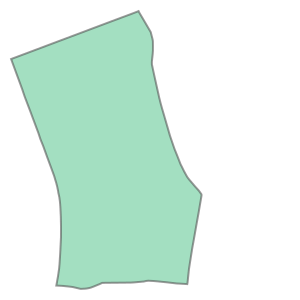

In [ ]:
zips.loc[0,"geometry"]

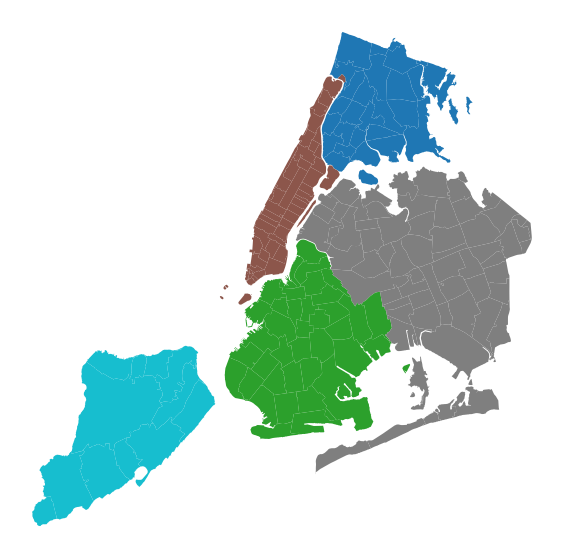

In [ ]:
ax = zips.plot(column="COUNTY", figsize=(10,10))
ax.axis('off');

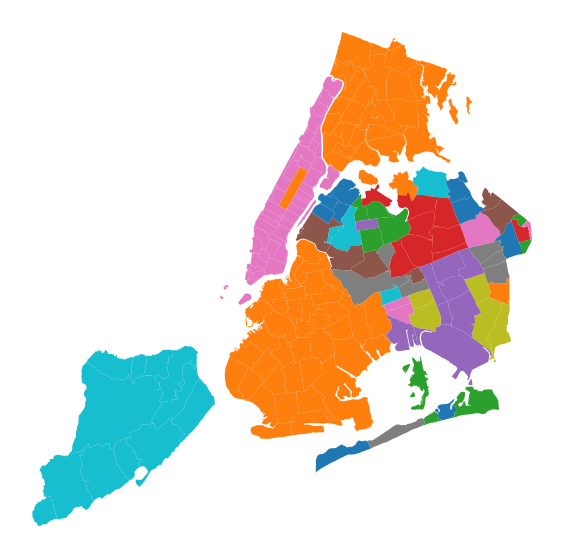

In [ ]:
ax = zips.plot(column="PO_NAME", figsize=(10,10))
ax.axis('off');

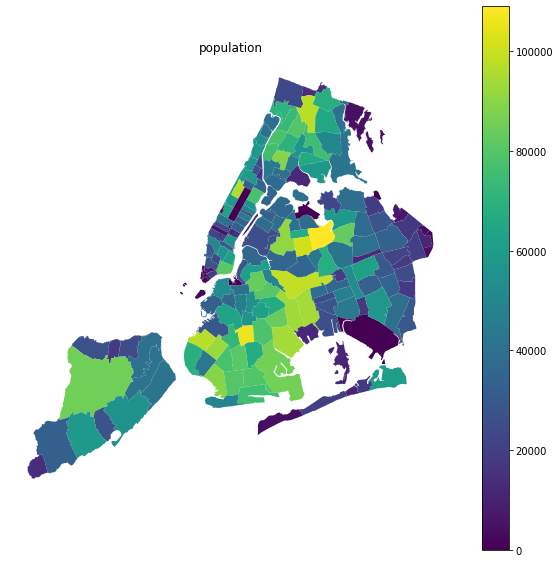

In [ ]:
ax = zips.plot(column="POPULATION", figsize=(10,10), legend=True)
ax.set_title("population")
ax.axis('off');


In [ ]:
zips.dissolve(by="COUNTY")

,geometry,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN
COUNTY,,,,,,,,,,,,
Bronx,"MULTIPOLYGON (((1013982.340 228008.359, 101397...",10471,0,Bronx,23477.0,8.965141e+07,NY,36,005,http://www.usps.com/,0.0,0.0
Kings,"MULTIPOLYGON (((995654.726 148395.272, 995672....",11213,0,Brooklyn,62426.0,2.963100e+07,NY,36,047,http://www.usps.com/,0.0,0.0
New York,"MULTIPOLYGON (((982643.204 195836.782, 982643....",10463,0,Bronx,70641.0,3.119702e+06,NY,36,061,http://www.usps.com/,0.0,0.0
Queens,"MULTIPOLYGON (((1017737.930 143982.218, 101772...",11436,0,Jamaica,18681.0,2.269930e+07,NY,36,081,http://www.usps.com/,0.0,0.0
Richmond,"POLYGON ((914830.906 127205.951, 914831.917 12...",10301,0,Staten Island,40438.0,1.051827e+08,NY,36,085,http://www.usps.com/,0.0,0.0


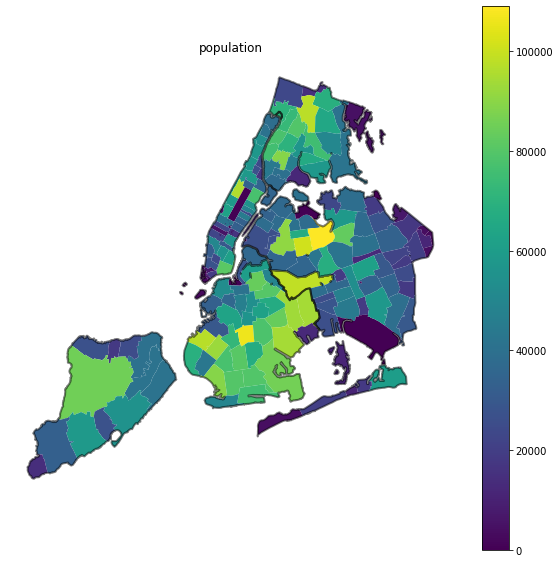

In [ ]:
ax = zips.plot(column="POPULATION", figsize=(10,10), legend=True)
#counties =
zips.dissolve(by="COUNTY").plot(lw=2, edgecolor="k", alpha=0.5, facecolor="none", ax=ax)
ax.set_title("population")
ax.axis('off');


## data preprocessing

In [ ]:
nychouses["price"]

0        2599988.0
1        7575000.0
2        8475000.0
3        3550000.0
4        4420000.0
           ...    
1525     3750000.0
1526     8500000.0
1529    25950000.0
1530      839000.0
1531      449000.0
Name: price, Length: 1100, dtype: float64

In [ ]:
nychouses["price"] = pd.to_numeric(nychouses.price, errors="coerce")
nychouses["price"].dtypes

dtype('float64')

In [ ]:
tmp_ = zips.merge(nychouses, right_on="zip", left_on="ZIPCODE").reset_index()
tmp_.merge(tmp_[["ZIPCODE", "price"]].groupby("ZIPCODE").mean().reset_index(
    ), on="ZIPCODE")


,index,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,address,city,state,zip,price_x,sqft,bedrooms,bathrooms,days_on_zillow,sale_type,url,price_y
0,0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11756 140th St,Jamaica,NY,11436,529999.0,1240.0,4.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.299990e+05
1,1,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",11756 140th St,Jamaica,NY,11436,529999.0,1240.0,4.0,2.0,NaN,House For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.299990e+05
2,2,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1006203.169 257345.657, 1006214.666 ...",1793 Riverside Dr APT 3I,New York,NY,10034,619000.0,900.0,2.0,1.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.950360e+05
3,3,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1006203.169 257345.657, 1006214.666 ...",24 Cooper St APT 4E,New York,NY,10034,225000.0,NaN,2.0,1.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.950360e+05
4,4,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1006203.169 257345.657, 1006214.666 ...",24 Cooper St APT 1C,New York,NY,10034,155000.0,NaN,1.0,1.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,5.950360e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,1528,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",350 W 42nd St # 5LL,New York,NY,10036,1275000.0,957.0,2.0,2.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...,6.720077e+06
1529,1529,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",434 W 47th St APT 4W,New York,NY,10036,785000.0,950.0,2.0,1.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,6.720077e+06
1530,1530,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",646 9th Ave APT 2FS,New York,NY,10036,449000.0,510.0,0,10.0,NaN,Co-op For Sale,http://www.zillow.com/homes/for_sale//homedeta...,6.720077e+06
1531,1531,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",635 W 42nd St APT 27K,New York,NY,10036,50000000.0,12500.0,10.0,10.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...,6.720077e+06


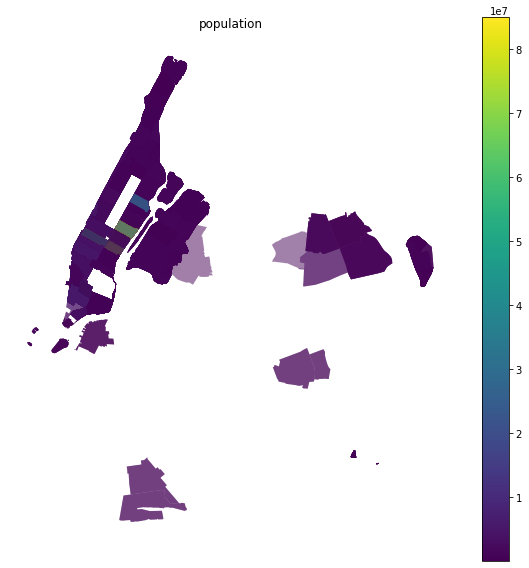

In [ ]:
ax = tmp_.merge(tmp_[["ZIPCODE", "price"]].groupby("ZIPCODE").mean().reset_index(
    ), on="ZIPCODE").plot(column="price_x", alpha=0.5, figsize=(10,10), legend=True)
ax.set_title("price")
ax.axis('off');

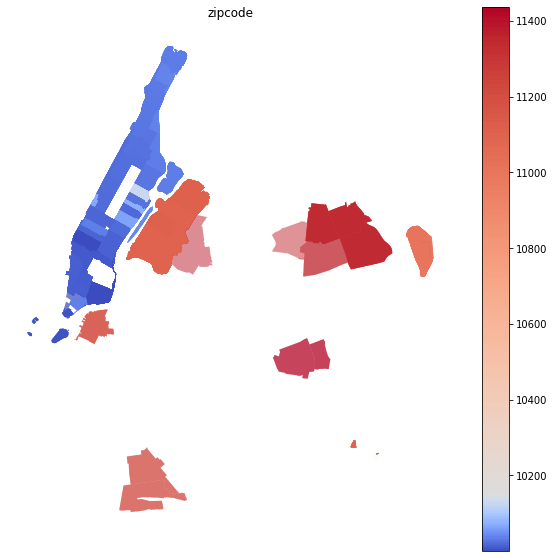

In [ ]:
import matplotlib.colors as colors
tmp_["ZIPCODE"] = tmp_["ZIPCODE"].astype(int)
ax = tmp_.plot(column="ZIPCODE", alpha=0.5, figsize=(10,10), legend=True,
               cmap="coolwarm",  norm=matplotlib.colors.TwoSlopeNorm(
                   10150,
                   tmp_["ZIPCODE"].min(), tmp_["ZIPCODE"].max()))
ax.set_title("zipcode")
ax.axis('off');

### merge zillow w NYC zips shapefile to get only NYC listings

In [ ]:
nychouses = nychouses.merge(zips[["ZIPCODE"]], left_on="zip", right_on="ZIPCODE")
nychouses.head()

,address,city,state,zip,price,sqft,bedrooms,bathrooms,days_on_zillow,sale_type,url,ZIPCODE
0,263 9th Ave APT 6B,New York,NY,10001,2599988.0,1536.0,2.0,2.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...,10001
1,15 Hudson Yards # 67E,New York,NY,10001,7575000.0,2497.0,2.0,3.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...,10001
2,15 Hudson Yards # PH86D,New York,NY,10001,8475000.0,2515.0,3.0,4.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...,10001
3,540 W 28th St PH A,New York,NY,10001,3550000.0,1755.0,2.0,2.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...,10001
4,15 Hudson Yards # 34G,New York,NY,10001,4420000.0,1460.0,2.0,3.0,NaN,Condo For Sale,http://www.zillow.com/homes/for_sale//homedeta...,10001


### clean up data

In [ ]:
nychouses.drop(["ZIPCODE", 'city', 'state', 'url', 'address'], axis=1, inplace=True)

In [ ]:
nychouses.columns


Index(['zip', 'price', 'sqft', 'bedrooms', 'bathrooms', 'days_on_zillow',
       'sale_type'],
      dtype='object')

In [ ]:
#days on zillow would be interesting, but it came up as nan
nychouses.drop(["days_on_zillow"], axis=1, inplace=True)

In [ ]:
# removing nans cause sklearn random forest cant deal with them
nychouses.dropna(inplace=True)

In [ ]:
for f in [u'price',           u'sqft',
             u'bedrooms',      u'bathrooms']:
    nychouses[f] = nychouses[f].map(float)

In [ ]:
nychouses.head()

,zip,price,sqft,bedrooms,bathrooms,sale_type
0,10001,2599988.0,1536.0,2.0,2.0,Condo For Sale
1,10001,7575000.0,2497.0,2.0,3.0,Condo For Sale
2,10001,8475000.0,2515.0,3.0,4.0,Condo For Sale
3,10001,3550000.0,1755.0,2.0,2.0,Condo For Sale
4,10001,4420000.0,1460.0,2.0,3.0,Condo For Sale


### creating a categorical target variable from the price  to demonstrate classification trees:
is price >1M -> 1

else -> 0

In [ ]:
yc = np.array([1 if c > 1e6 else 0 for c in nychouses.price])
yc

array([1, 1, 1, ..., 1, 0, 0])

### Option 1 to deal with categorical data

In [ ]:
nychouses.sale_type.unique()

array(['Condo For Sale', 'Townhouse For Sale', 'For Sale by Owner',
       'Co-op For Sale', 'Apartment For Sale', 'House For Sale',
       'New Construction', 'Foreclosure', 'Foreclosed', 'Auction'],
      dtype=object)

technically each feature should be a binary - one-hot encoding this feature would generate 10 binary features (is it a Condo For Sale y/2, is it a Foreclosure Y/N) but of there are few choices it is also ok to encode them as numerical features.

In [ ]:
nychouses["sale_type_num"] = pd.Categorical(nychouses.sale_type).codes

In [ ]:
nychouses.head()

,zip,price,sqft,bedrooms,bathrooms,sale_type,sale_type_num
0,10001,2599988.0,1536.0,2.0,2.0,Condo For Sale,3
1,10001,7575000.0,2497.0,2.0,3.0,Condo For Sale,3
2,10001,8475000.0,2515.0,3.0,4.0,Condo For Sale,3
3,10001,3550000.0,1755.0,2.0,2.0,Condo For Sale,3
4,10001,4420000.0,1460.0,2.0,3.0,Condo For Sale,3


#### whitening or not whitening?

In [ ]:
Xnum = nychouses.drop(["price","sale_type"], axis=1) #preprocessing.scale(nychouses.drop(["price","sale_type"], axis=1))
yy = nychouses.price #preprocessing.scale(nychouses.price)

### Option 2 to deal w categorical data: one-hot encoding
1hot encoding all categorical data: sale_type and zipcode as well

In [ ]:
nyc1hot = pd.merge(nychouses, pd.get_dummies(nychouses[u'zip']),
         left_index=True, right_index=True).merge(pd.get_dummies(nychouses["sale_type"]),
                                                  left_index=True,
                                                  right_index=True).drop(["zip", "sale_type",
                                                                          "sale_type_num"],
                                                                    axis=1)
nyc1hot.head()

,price,sqft,bedrooms,bathrooms,10001,10002,10004,10006,10007,10010,10011,10012,10013,10014,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10044,10065,10069,10075,10128,11001,11004,11005,11040,11096,11101,11102,11103,11104,11105,11106,11109,11201,11229,11235,11355,11361,11364,11365,11436,Apartment For Sale,Auction,Co-op For Sale,Condo For Sale,For Sale by Owner,Foreclosed,Foreclosure,House For Sale,New Construction,Townhouse For Sale
0,2599988.0,1536.0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,7575000.0,2497.0,2.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8475000.0,2515.0,3.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3550000.0,1755.0,2.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4420000.0,1460.0,2.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
nyc1hot.columns

Index(['price', 'sqft', 'bedrooms', 'bathrooms', '10001', '10002', '10004',
       '10006', '10007', '10010', '10011', '10012', '10013', '10014', '10016',
       '10017', '10018', '10019', '10021', '10022', '10023', '10024', '10025',
       '10026', '10027', '10028', '10029', '10030', '10031', '10032', '10033',
       '10034', '10035', '10036', '10037', '10038', '10039', '10040', '10044',
       '10065', '10069', '10075', '10128', '11001', '11004', '11005', '11040',
       '11096', '11101', '11102', '11103', '11104', '11105', '11106', '11109',
       '11201', '11229', '11235', '11355', '11361', '11364', '11365', '11436',
       'Apartment For Sale', 'Auction', 'Co-op For Sale', 'Condo For Sale',
       'For Sale by Owner', 'Foreclosed', 'Foreclosure', 'House For Sale',
       'New Construction', 'Townhouse For Sale'],
      dtype='object')

In [ ]:
nyc1hot.shape

(1100, 73)

#### whitening or not whitening?

In [ ]:
X1hot = nyc1hot.drop("price", axis=1) #preprocessing.scale(nyc1hot.drop("price", axis=1))

In [ ]:
y = nyc1hot.price #preprocessing.scale(nyc1hot.price)
y

0        2599988.0
1        7575000.0
2        8475000.0
3        3550000.0
4        4420000.0
           ...    
1525     3750000.0
1526     8500000.0
1529    25950000.0
1530      839000.0
1531      449000.0
Name: price, Length: 1100, dtype: float64

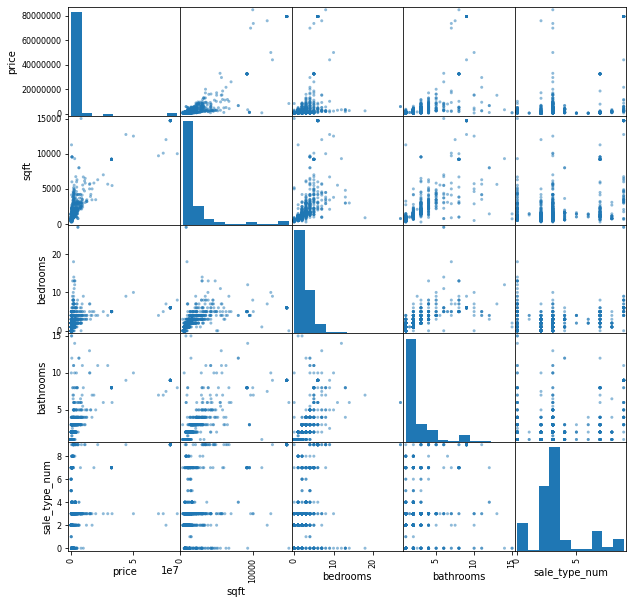

In [ ]:
#takse too long
pd.plotting.scatter_matrix(nychouses, figsize=(10,10));

# Single Tree Classifier

categorical encoded as numerical

In [ ]:
Xnum.shape

(1100, 5)

categorical 1-hot encoded

In [ ]:
onetree_numencoded =  tree.DecisionTreeClassifier(random_state=112).fit(Xnum, yc)
print ("in-sample score of 1-hot encoded tree classifier %.6f"%onetree_numencoded.score(Xnum, yc))

in-sample score of 1-hot encoded tree classifier 0.998182


In [ ]:
X1hot.shape

(1100, 72)

In [ ]:
tree.DecisionTreeClassifier?

In [ ]:
onetree_1hotencoded =  tree.DecisionTreeClassifier(random_state=112).fit(X1hot, yc)
print ("in-sample score of tree classifier %.6f"%onetree_1hotencoded.score(X1hot, yc))

in-sample score of tree classifier 0.998182


 plot trees

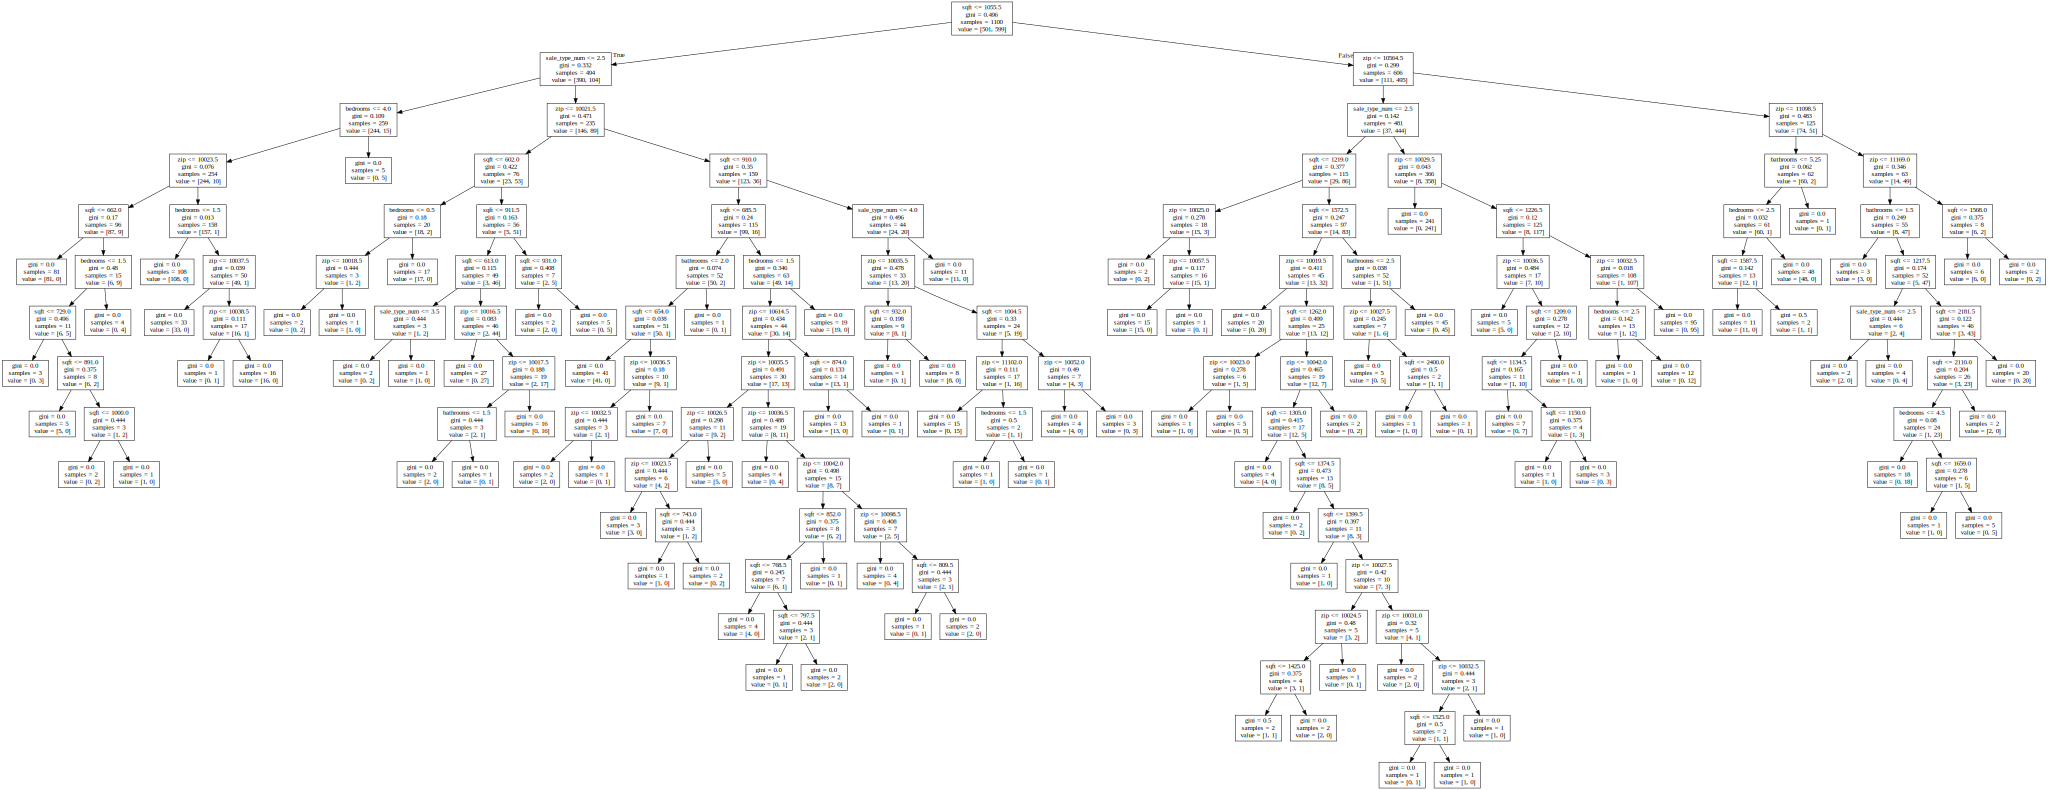

In [ ]:
dot_data = tree.export_graphviz(onetree_numencoded,
                                feature_names=nychouses.drop(["price","sale_type"], axis=1).columns,
                                out_file=None)
graph = graphviz.Source(dot_data)
graph

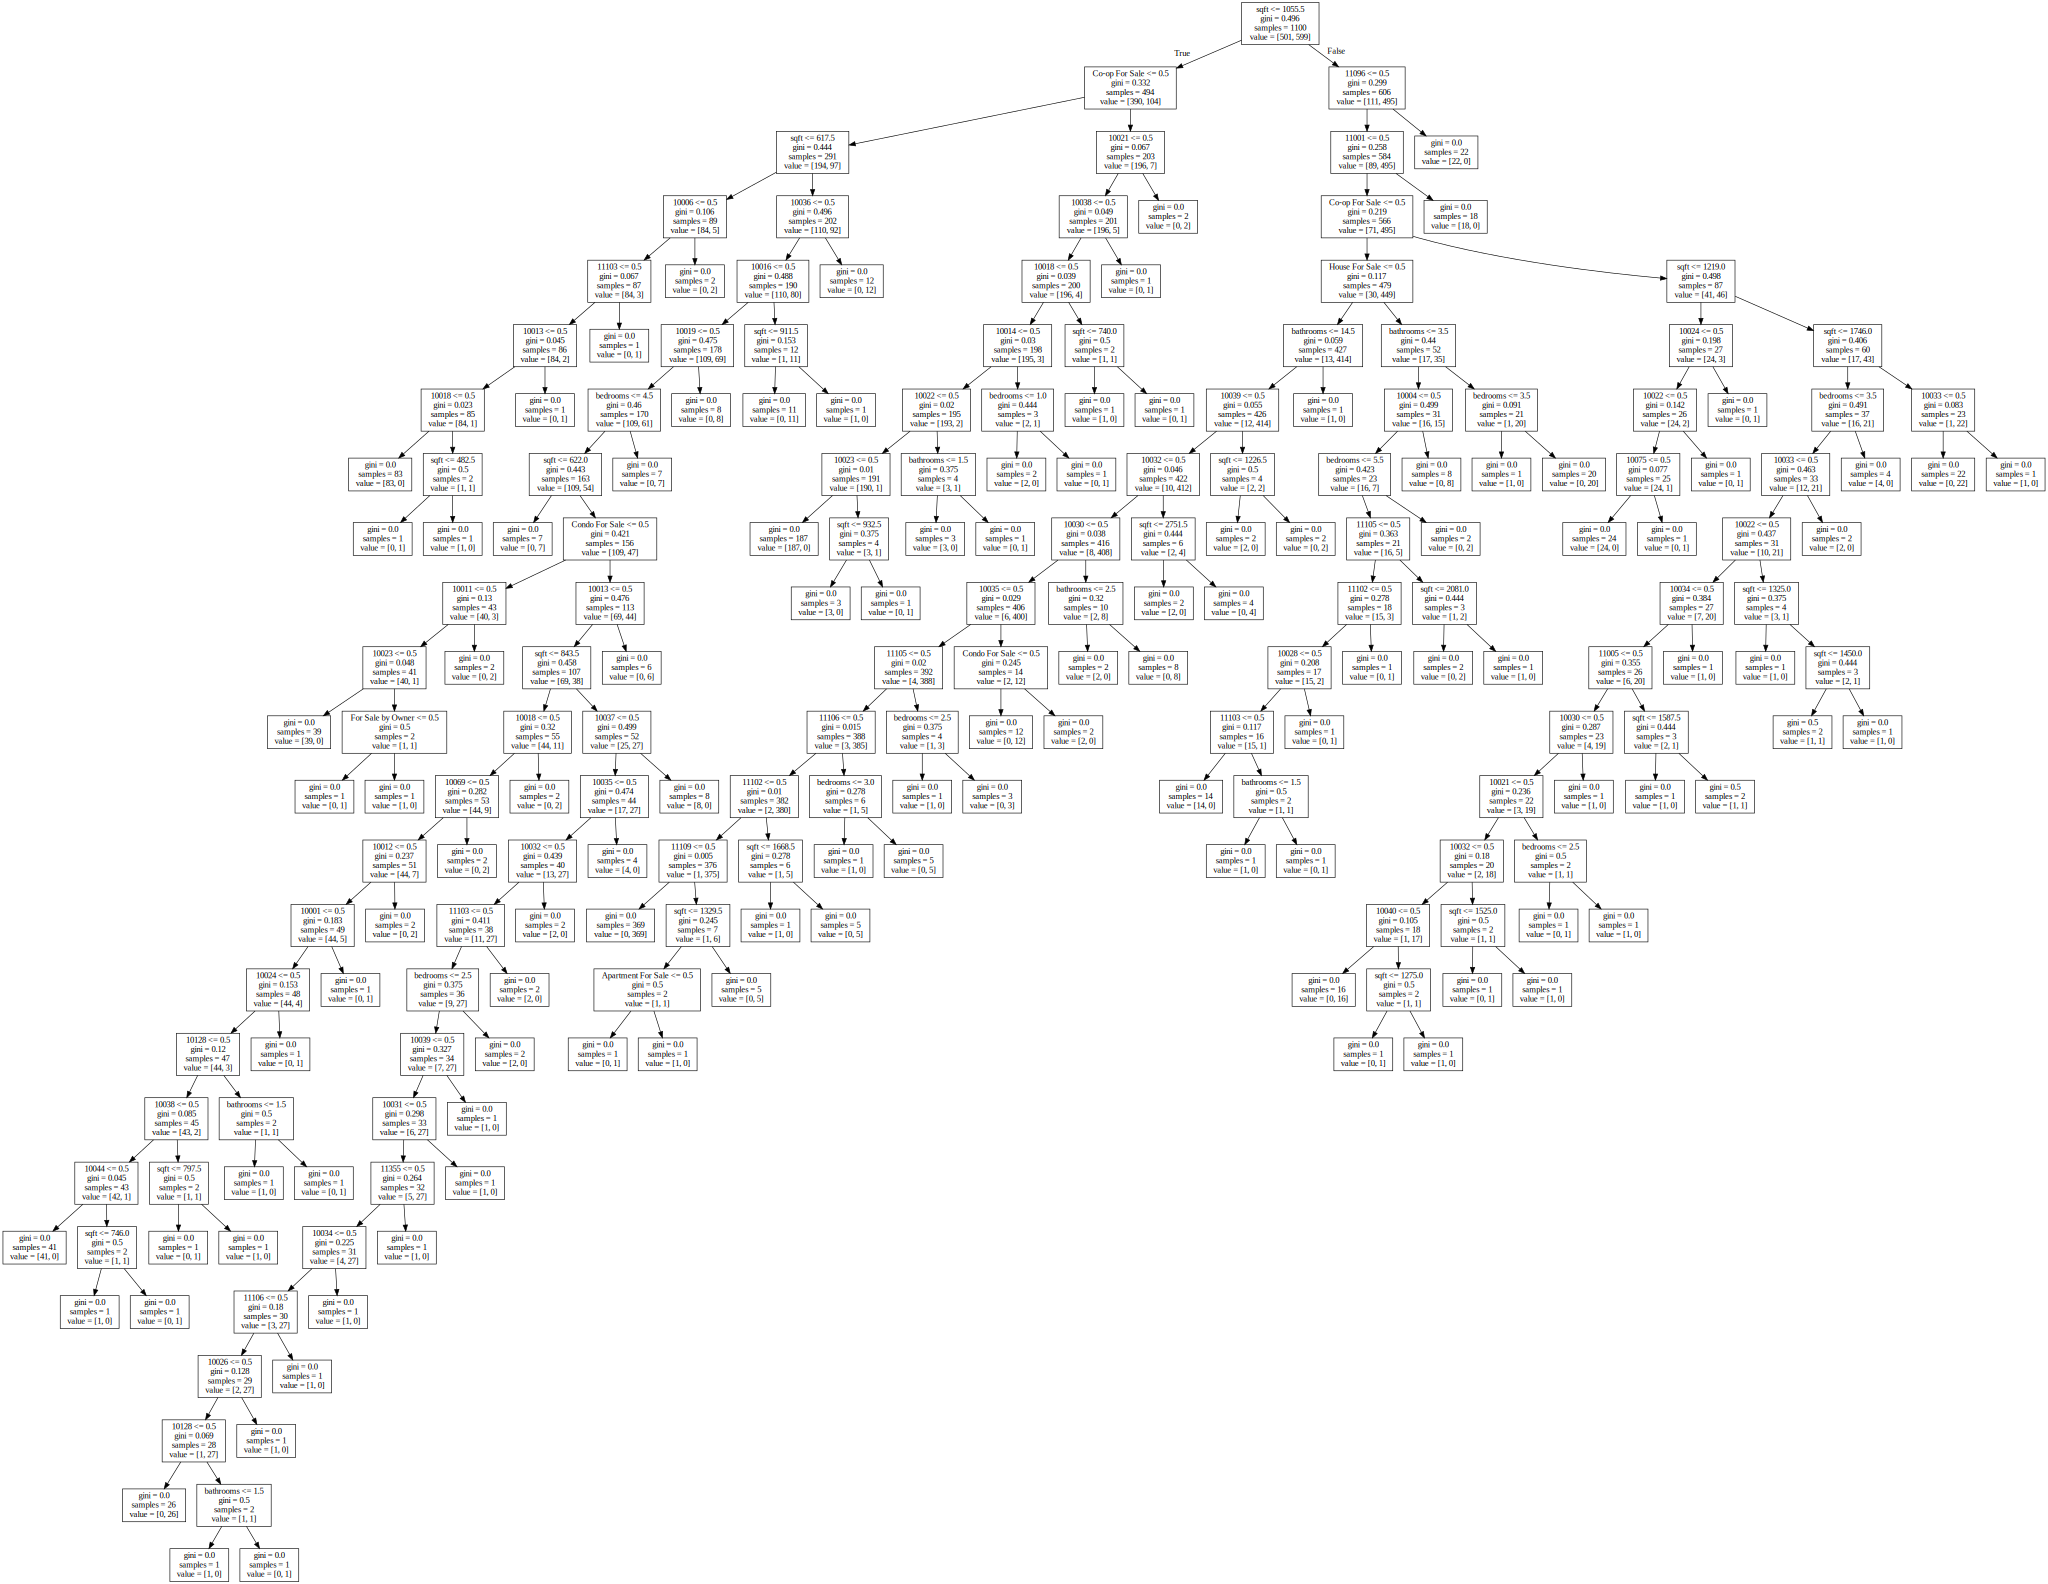

In [ ]:
dot_data = tree.export_graphviz(onetree_1hotencoded,
                                feature_names=nyc1hot.drop("price", axis=1).columns,
                                out_file=None)
graph = graphviz.Source(dot_data)
graph

# comparison with regression models - in sample comparison

## Regression

### Linear regression

In [ ]:
linearReg = linear_model.LinearRegression()
linearReg = linearReg.fit(Xnum, y)
print ("in-sample score of linear regression %.2f"%linearReg.score(Xnum, y))

in-sample score of linear regression 0.81


### Ridge regression: regression with penalization for high coefficients

In [ ]:
ridge = linear_model.RidgeCV()
ridge = ridge.fit(Xnum, y)
print ("in-sample score of ridge regression %.2f"%ridge.score(Xnum, y))

in-sample score of ridge regression 0.81


## Categorical

### Logistic regression (NB: its always categorical)

In [ ]:
logisticc = linear_model.LogisticRegressionCV()
logisticc = logisticc.fit(X1hot, yc)
print ("in-sample score of logistic regression (classification) %.2f"%logisticc.score(X1hot, yc))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


in-sample score of logistic regression (classification) 0.82


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### Ridge classification (Categorical version of Ridge regression)

In [ ]:
ridgec = linear_model.RidgeClassifierCV()
ridgec = ridgec.fit(X1hot, yc)
print ("in-sample score of ridge classification %.2f"%ridgec.score(X1hot, yc))

in-sample score of ridge classification 0.91


## CART: Classification and Regression Tree Methods

## Tree Classification models

### Random Forest

In [ ]:
rfc = ensemble.RandomForestClassifier()
rfcat = rfc.fit(X1hot, yc)
print ("in-sample score of random forest classifier (one-hot) %.2f"%rfcat.score(X1hot,yc))

in-sample score of random forest classifier (one-hot) 1.00


In [ ]:
rfn = ensemble.RandomForestClassifier()
rfnum = rfn.fit(Xnum, yc)
print ("in-sample score of random forest classifier (numerical) %.2f"%rfnum.score(Xnum,yc))

in-sample score of random forest classifier (numerical) 1.00


### Gradient boosted trees

In [ ]:
gbc = ensemble.GradientBoostingClassifier()
gbcat = gbc.fit(X1hot, yc)
print ("in-sample score of gradient boosted tree classifier (one-hot) %.2f"%gbcat.score(X1hot,yc))

in-sample score of gradient boosted tree classifier (one-hot) 0.96


In [ ]:
gbn = ensemble.GradientBoostingClassifier()
gbnum = gbn.fit(Xnum, yc)
print ("in-sample score of gradient boosted tree classifier (one-hot) %.2f"%gbnum.score(Xnum,yc))

in-sample score of gradient boosted tree classifier (one-hot) 0.97


## Tree regression models

### Random Forest

In [ ]:
rfr = ensemble.RandomForestRegressor()
rfreg1hot = rfr.fit(X1hot, y)
print ("in-sample score of random forest regression %.2f"%rfreg1hot.score(X1hot,y))

in-sample score of random forest regression 0.99


In [ ]:
rfreg = rfr.fit(Xnum, y)
print ("in-sample score of random forest regression %.2f"%rfreg.score(Xnum,y))

in-sample score of random forest regression 0.99


### Gradient boosted trees

In [ ]:
gbr = ensemble.GradientBoostingRegressor()
gbreg1hot = gbr.fit(X1hot, y)
print ("in-sample score of gradient boosted regression %.2f"%gbreg1hot.score(X1hot,y))

in-sample score of gradient boosted regression 1.00


In [ ]:
gbreg = gbr.fit(Xnum, y)
print ("in-sample score of gradient boosted regression %.2f"%gbreg.score(Xnum,y))

in-sample score of gradient boosted regression 1.00


### NOTE: these models are certainly overfitting and need to be pruned!

# out of sample comparisons

### split sampoe into training and testting set (60-30 split)

In [ ]:
#regression sample
X_train, X_test, y_train, y_test = train_test_split(Xnum, y, test_size=0.3, random_state=0)

# classification sample
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xnum, yc, test_size=0.3, random_state=0)

# classsification sample one-hot encoded
X1hot_train, X1hot_test, y1hot_train, y1hot_test = train_test_split(X1hot, yc, test_size=0.3, random_state=0)


## Categorical

### logistic

In [ ]:
logisticc = linear_model.LogisticRegressionCV().fit(X1hot_train, y1hot_train)
print ("score of logistic regression in-sample %.2f, out-sample %.2f"%(
        logisticc.score(X1hot_train, y1hot_train), logisticc.score(X1hot_test, y1hot_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


score of logistic regression in-sample 0.95, out-sample 0.94


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### ridge

In [ ]:
ridgec = ridgec.fit(X1hot_train, y1hot_train)
print ("sample score of ridge classifier (one-hot) in-sample %.2f, out-sample %.2f"%(
        ridgec.score(X1hot_train, y1hot_train), ridgec.score(X1hot_test, y1hot_test)))

sample score of ridge classifier (one-hot) in-sample 0.93, out-sample 0.90


In [ ]:
ridgec = ridgec.fit(Xc_train, yc_train)
print ("sample score of ridge classifier numerical encoding in-sample %.2f, out-sample %.2f"%(
        ridgec.score(Xc_train, yc_train), ridgec.score(Xc_test, yc_test)))

sample score of ridge classifier numerical encoding in-sample 0.82, out-sample 0.80


### single tree

In [ ]:
onetree =  tree.DecisionTreeClassifier().fit(X1hot_train, y1hot_train)
print ("out of sample score of single tree (one-hot) in-sample %.2f, out-sample %.2f"%(
        onetree.score(X1hot_train, y1hot_train), onetree.score(X1hot_test, y1hot_test)))

out of sample score of single tree (one-hot) in-sample 1.00, out-sample 0.87


### random forest

In [ ]:
rfcat = rfc.fit(X1hot_train, y1hot_train)
print ("out of sample score of random forest (one-hot) %.2f"%rfcat.score(X1hot_test, y1hot_test))

out of sample score of random forest (one-hot) 0.91


### gradient boosted

In [ ]:
gbcat = gbc.fit(X1hot_train, y1hot_train)
print ("out of sample score of gradient boosted (one-hot) %.2f"%gbcat.score(X1hot_test, y1hot_test))

out of sample score of gradient boosted (one-hot) 0.91


## numerical regression

### linear

In [ ]:
linear = linear_model.LinearRegression().fit(X_train, y_train)
print ("regression score of linear regression in-sample %.2f, out-sample %.2f"%(
        linear.score(X_train, y_train), linear.score(X_test, y_test)))

regression score of linear regression in-sample 0.81, out-sample 0.81


### ridge

In [ ]:
ridge = ridge.fit(X_train, y_train)
print ("out of sample score of ridge regression in-sample %.2f, out-sample %.2f"%(
        ridge.score(X_train, y_train), ridge.score(X_test, y_test)))

out of sample score of ridge regression in-sample 0.81, out-sample 0.81


### one tree

In [ ]:
onetree =  tree.DecisionTreeRegressor().fit(X_train, y_train)
print ("regression: score of single tree numerical encoding  in-sample %.2f, out-sample %.2f"%(
        onetree.score(X_train, y_train), onetree.score(X_test, y_test)))

regression: score of single tree numerical encoding  in-sample 1.00, out-sample 0.86


In [ ]:
onetree =  tree.DecisionTreeClassifier().fit(X_train, yc_train)
print ("classification: sample score of single tree numerical encoding  in-sample %.2f, out-sample %.2f"%(
        onetree.score(X_train, yc_train), onetree.score(X_test, yc_test)))

classification: sample score of single tree numerical encoding  in-sample 1.00, out-sample 0.91


In [ ]:
onetree =  tree.DecisionTreeClassifier().fit(X1hot_train, y1hot_train)
print ("classification: score of single tree one-hot encoding  in-sample %.2f, out-sample %.2f"%(
        onetree.score(X1hot_train, y1hot_train), onetree.score(X1hot_test, y1hot_test)))

classification: score of single tree one-hot encoding  in-sample 1.00, out-sample 0.91


### random forest

In [ ]:
rf = rfr.fit(X_train, y_train)
print ("regression: out of sample score of random forest numerical encoding in-sample %.2f, out-sample %.2f"%(
        rf.score(X_train, y_train), rf.score(X_test, y_test)))

regression: out of sample score of random forest numerical encoding in-sample 0.99, out-sample 0.92


In [ ]:
rfnum = rfn.fit(X_train, yc_train)
print ("out of sample score of random forest numerical encoding in-sample %.2f, out-sample %.2f"%(
        rfnum.score(X_train, yc_train), rfnum.score(X_test, yc_test)))

out of sample score of random forest numerical encoding in-sample 1.00, out-sample 0.92


In [ ]:
rfcat = rfc.fit(X1hot_train, y1hot_train)
print ("out of sample score of random forest one-hot in-sample %.2f, out-sample %.2f"%(
        rfcat.score(X1hot_train, y1hot_train), rfcat.score(X1hot_test, y1hot_test)))

out of sample score of random forest one-hot in-sample 1.00, out-sample 0.91


### gradient boosted trees

In [ ]:
gb = gbr.fit(X_train, y_train)
print ("regression: out of sample score of gradient boosted numerical encoding in-sample %.2f, out-sample %.2f"%(
        gb.score(X_train, y_train), gb.score(X_test, y_test)))

regression: out of sample score of gradient boosted numerical encoding in-sample 1.00, out-sample 0.94


In [ ]:
gbnum = gbn.fit(X_train, yc_train)
print ("classification: out of sample score of gradient boosted numerical encoding in-sample %.2f, out-sample %.2f"%(
        gbnum.score(X_train, yc_train), gbnum.score(X_test, yc_test)))

classification: out of sample score of gradient boosted numerical encoding in-sample 0.98, out-sample 0.92


In [ ]:
gbcat = gbc.fit(X1hot_train, y1hot_train)
print ("classification: out of sample score of gradient boosted one-hot in-sample %.2f, out-sample %.2f"%(
        gbcat.score(X1hot_train, y1hot_train), gbcat.score(X1hot_test, y1hot_test)))

classification: out of sample score of gradient boosted one-hot in-sample 0.96, out-sample 0.91


| |    ||      |      regression|        ||       |CART |           |
|---|----||----|-----|----------||---------|----------|---------|
|**purpose**| **encoding** || linear reg | logistic | ridge|| one tree | RF |GBT |
|regression|numerical||0.81/0.81| 0.81/0.81||1.00/0.91|0.99/0.94|1.0/0.93|
|classification|numerical|| |0.82/0.80|1.00/0.91||1.00/0.91|0.88/079| |
|classification|one-hot|| |0.93/0.91|0.95/0.91||0.99/0.91|0.99/0.91|0.96/0.91|




## ROC curves provide a better metric for comparison:
plot false positive rate vs false negative rate (completeness vs accuracy)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# evaluate the model using 10-fold cross-validation
print ("one-hot encoding")

scores = cross_val_score(ensemble.RandomForestClassifier(),
                         X1hot, yc, scoring='roc_auc', cv=10)
print("Ridge {:.2f}".format(scores.mean()))

scores = cross_val_score(ensemble.RandomForestClassifier(),
                         X1hot, yc, scoring='roc_auc', cv=10)
print("RF {:.2f}".format(scores.mean()))

scores = cross_val_score(ensemble.RandomForestClassifier(),
                         X1hot, yc, scoring='roc_auc', cv=10)
print("GBT {:.2f}".format(scores.mean()))

one-hot encoding
Ridge 0.91
RF 0.90
GBT 0.91


In [ ]:
print ("numerical encoding")

scores = cross_val_score(ensemble.RandomForestClassifier(),
                         Xnum, yc, scoring='roc_auc', cv=10)
print("Ridge {:.2f}".format(scores.mean()))

scores = cross_val_score(ensemble.RandomForestClassifier(),
                         Xnum, yc, scoring='roc_auc', cv=10)

print("RF {:.2f}".format(scores.mean()))

scores = cross_val_score(ensemble.RandomForestClassifier(),
                         Xnum, yc, scoring='roc_auc', cv=10)
print("GBT {:.2f}".format(scores.mean()))

numerical encoding
Ridge 0.93
RF 0.93
GBT 0.93


In [ ]:
y_pred_grd_logit = logisticc.predict(X1hot_test)
fpr_grd_logit, tpr_grd_logit, _ = metrics.roc_curve(y1hot_test, y_pred_grd_logit)

y_pred_grd_ridge = ridgec.predict(Xc_test)
fpr_grd_ridge, tpr_grd_ridge, _ = metrics.roc_curve(yc_test, y_pred_grd_ridge)

y_pred_grd_rfnum = rfnum.predict_proba(X_test)[:, 1]
fpr_grd_rf, tpr_grd_rf, _ = metrics.roc_curve(yc_test, y_pred_grd_rfnum)

y_pred_grd_rfcat = rfcat.predict_proba(X1hot_test)[:, 1]
fpr_grd_rfcat, tpr_grd_rfcat, _ = metrics.roc_curve(y1hot_test, y_pred_grd_rfcat)

y_pred_grd_gbnum = gbnum.predict_proba(X_test)[:, 1]
fpr_grd_gb, tpr_grd_gb, _ = metrics.roc_curve(yc_test, y_pred_grd_gbnum)

y_pred_grd_gbcat = gbcat.predict_proba(X1hot_test)[:, 1]
fpr_grd_gbcat, tpr_grd_gbcatt, _ = metrics.roc_curve(y1hot_test, y_pred_grd_gbcat)

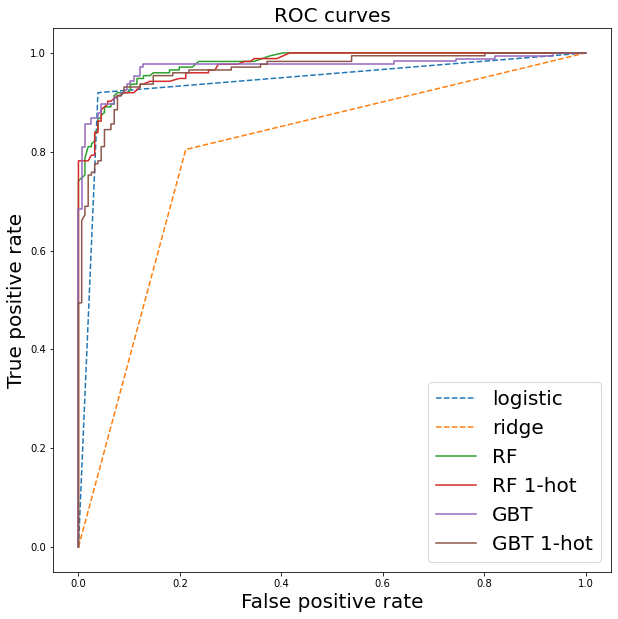

In [ ]:
pl.figure(figsize=(10,10))
pl.plot(fpr_grd_logit, tpr_grd_logit, '--', label='logistic')
pl.plot(fpr_grd_ridge, tpr_grd_ridge, '--', label='ridge')
pl.plot(fpr_grd_rf, tpr_grd_rf, label='RF')
pl.plot(fpr_grd_rfcat, tpr_grd_rfcat, label='RF 1-hot')
pl.plot(fpr_grd_gb, tpr_grd_gb, label='GBT')
pl.plot(fpr_grd_gbcat, tpr_grd_gbcatt, label='GBT 1-hot')
pl.legend(fontsize=20)
pl.xlabel('False positive rate', fontsize=20)
pl.ylabel('True positive rate', fontsize=20)
pl.title('ROC curves', fontsize=20);

# the best part is feature importance

In [ ]:
#the feature importance is a measure of how soon and how often a feature was used and is encded as a 0-1 number per feature
rfnum.feature_importances_

array([0.25747268, 0.33239138, 0.08181625, 0.19832049, 0.1299992 ])

In [ ]:
importancesrf = rfnum.feature_importances_
importancesrf
std = np.std([onetree.feature_importances_ for onetree in rf.estimators_],
             axis=0)
indicesrf = np.argsort(importancesrf)[::-1]




# Print the feature ranking
print("Feature ranking:")

for f in range(Xnum.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indicesrf[f],
                                   nychouses.drop(["price","sale_type"], axis=1).columns[
                indicesrf[f]],
                                   importancesrf[indicesrf[f]]))


Feature ranking:
1. feature 1 sqft (0.332391)
2. feature 0 zip (0.257473)
3. feature 3 bathrooms (0.198320)
4. feature 4 sale_type_num (0.129999)
5. feature 2 bedrooms (0.081816)


In [ ]:
importancesrfcat = rfcat.feature_importances_
indicesrfcat = np.argsort(importancesrfcat)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1hot.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indicesrfcat[f],
                                   nyc1hot.drop("price", axis=1).columns[
                indicesrfcat[f]],
                                   importancesrfcat[indicesrfcat[f]]))


Feature ranking:
1. feature 0 sqft (0.271409)
2. feature 2 bathrooms (0.150705)
3. feature 1 bedrooms (0.084227)
4. feature 64 Co-op For Sale (0.070844)
5. feature 65 Condo For Sale (0.037233)
6. feature 46 11096 (0.028509)
7. feature 16 10019 (0.022177)
8. feature 42 11001 (0.020089)
9. feature 69 House For Sale (0.017917)
10. feature 70 New Construction (0.012968)
11. feature 33 10037 (0.012303)
12. feature 13 10016 (0.011085)
13. feature 9 10011 (0.010939)
14. feature 32 10036 (0.009820)
15. feature 11 10013 (0.009154)
16. feature 31 10035 (0.009152)
17. feature 5 10004 (0.009080)
18. feature 15 10018 (0.008813)
19. feature 62 Apartment For Sale (0.008541)
20. feature 39 10069 (0.008369)
21. feature 44 11005 (0.008016)
22. feature 17 10021 (0.007990)
23. feature 3 10001 (0.007912)
24. feature 71 Townhouse For Sale (0.007352)
25. feature 28 10032 (0.007223)
26. feature 36 10040 (0.006969)
27. feature 34 10038 (0.006329)
28. feature 22 10026 (0.006245)
29. feature 66 For Sale by Owner

In [ ]:
gbnum.feature_importances_

array([0.29690981, 0.41782086, 0.0292076 , 0.17715744, 0.07890428])

In [ ]:
importancesgbc = gbnum.feature_importances_
indicesgbc = np.argsort(importancesgbc)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(Xnum.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indicesgbc[f],
                                   nychouses.drop(["price","sale_type"], axis=1).columns[
                indicesgbc[f]],
                                   importancesgbc[indicesgbc[f]]))


Feature ranking:
1. feature 1 sqft (0.417821)
2. feature 0 zip (0.296910)
3. feature 3 bathrooms (0.177157)
4. feature 4 sale_type_num (0.078904)
5. feature 2 bedrooms (0.029208)


In [ ]:
importancesgbcat = gbcat.feature_importances_
indicesgbcat = np.argsort(importancesgbcat)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1hot.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indicesgbcat[f],
                                   nyc1hot.drop(["price"], axis=1).columns[
                indicesgbcat[f]],
                                   importancesgbcat[indicesgbcat[f]]))


Feature ranking:
1. feature 0 sqft (0.447702)
2. feature 2 bathrooms (0.134303)
3. feature 64 Co-op For Sale (0.102931)
4. feature 46 11096 (0.060545)
5. feature 42 11001 (0.039643)
6. feature 69 House For Sale (0.029168)
7. feature 65 Condo For Sale (0.019207)
8. feature 70 New Construction (0.014396)
9. feature 1 bedrooms (0.013685)
10. feature 11 10013 (0.010740)
11. feature 16 10019 (0.010015)
12. feature 33 10037 (0.009556)
13. feature 9 10011 (0.008692)
14. feature 32 10036 (0.008606)
15. feature 45 11040 (0.008067)
16. feature 44 11005 (0.007078)
17. feature 17 10021 (0.006808)
18. feature 39 10069 (0.006427)
19. feature 13 10016 (0.006079)
20. feature 34 10038 (0.005920)
21. feature 15 10018 (0.004759)
22. feature 31 10035 (0.004551)
23. feature 22 10026 (0.004226)
24. feature 6 10006 (0.004120)
25. feature 55 11229 (0.003946)
26. feature 53 11109 (0.003273)
27. feature 43 11004 (0.003211)
28. feature 10 10012 (0.003081)
29. feature 62 Apartment For Sale (0.003070)
30. feature 

In [ ]:
print ("different sorting by feature importance for RF and GBT")
indicesrf - indicesgbc, indicesrfcat - indicesgbcat

different sorting by feature importance for RF and GBT


(array([0, 0, 0, 0, 0]),
 array([  0,   0, -63,  18,  23, -23, -49, -28,  68,  59,  17, -20,   0,
          0, -34, -13, -12, -24,  49,   5,  29, -14, -19,  65, -27, -17,
         -9,  12,   4,  -9,   9, -26,   7,   1, -14,   2,  13,  -8,  13,
         35,  -1, -33,  19, -17, -13,  -5, -37, -27,  47, -33, -33,  41,
          8,   4, -61,  27, -11, -27, -14,  -4,   2,  44,   3,  38,  35,
         32,  11,  10, -40,  16,  16, -17]))

# Feature importance - numerical encoding

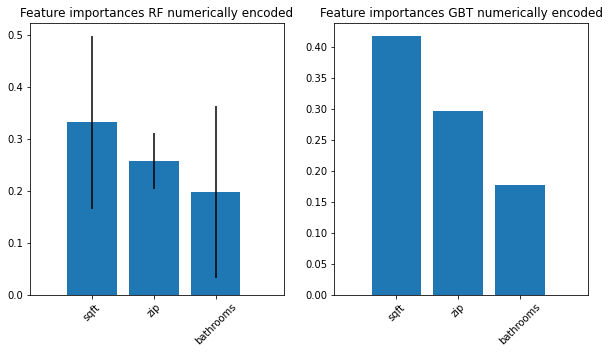

In [ ]:
import pylab as pl
fig = pl.figure(figsize=(10,5))

ax = fig.add_subplot(121)
importances = rfnum.feature_importances_
importances
std = np.std([onetree.feature_importances_ for onetree in rfnum.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



# Plot the feature importances of the forest
Nf = 3
pl.title("Feature importances RF numerically encoded")
pl.bar(range(Nf), importances[indices[:Nf]],
       yerr=std[indices[:Nf]], align="center")
pl.xticks(range(Nf), nychouses.drop(["price","sale_type"], axis=1).columns[indices[:Nf]])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
pl.xlim([-1, Nf + 0.1])

importances = gbnum.feature_importances_
importances
indices = np.argsort(importances)[::-1]


ax = fig.add_subplot(122)

# Plot the feature importances of the forest

pl.title("Feature importances GBT numerically encoded")
pl.bar(range(Nf), importances[indices[:Nf]], align="center")
pl.xticks(range(Nf), nychouses.drop(["price","sale_type"], axis=1).columns[indices[:Nf]])
pl.xlim([-1, Nf + 0.1])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
pl.show()


# Feature importance: one-hot encoding

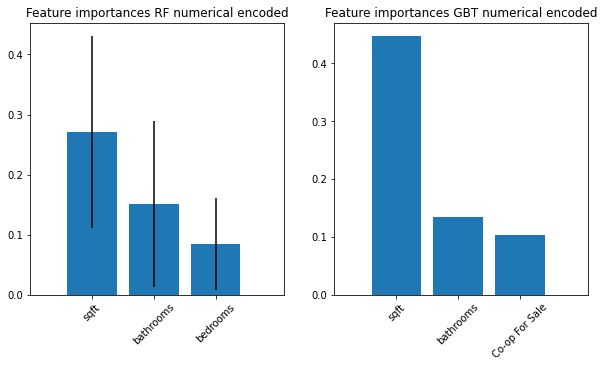

In [ ]:
fig = pl.figure(figsize=(10,5))

ax = fig.add_subplot(121)
importances = rfcat.feature_importances_
importances
std = np.std([onetree.feature_importances_ for onetree in rfcat.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



# Plot the feature importances of the forest

pl.title("Feature importances RF numerical encoded")
pl.bar(range(Nf), importances[indices[:Nf]],
       yerr=std[indices[:Nf]], align="center")
pl.xticks(range(Nf), nyc1hot.drop(["price"], axis=1).columns[indices[:Nf]])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
pl.xlim([-1, Nf + 0.1])

importances = gbcat.feature_importances_
importances
indices = np.argsort(importances)[::-1]


ax = fig.add_subplot(122)

# Plot the feature importances of the forest
Nf = 3
pl.title("Feature importances GBT numerical encoded")
pl.bar(range(Nf), importances[indices[:Nf]], align="center")
pl.xticks(range(Nf), nyc1hot.drop(["price"], axis=1).columns[indices[:Nf]])
pl.xlim([-1, Nf + 0.1])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

pl.show()

# The moral of the story is: beware of hot encoding and feature importance!

In [ ]:
!wget https://github.com/fedhere/MLPNS2021/blob/main/OHE/MercLargeCrats.zip?raw=true

--2021-04-20 12:23:15--  https://github.com/fedhere/MLPNS2021/blob/main/OHE/MercLargeCrats.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/MLPNS2021/raw/main/OHE/MercLargeCrats.zip [following]
--2021-04-20 12:23:15--  https://github.com/fedhere/MLPNS2021/raw/main/OHE/MercLargeCrats.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/MercLargeCrats.zip [following]
--2021-04-20 12:23:15--  https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/MercLargeCrats.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

In [ ]:
!unzip 'MercLargeCrats.zip?raw=true'

Archive:  MercLargeCrats.zip?raw=true
replace MercLargeCrats.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
mercelev = gpd.read_file("MercLargeCrats.shp")
mercelev.head()

,Diam_km,x_coord,y_coord,geometry
0,25.898448,1.637668,69.850060,"POLYGON ((-7595717.577 2961873.009, -7599747.9..."
1,21.395362,1.661689,68.680642,"POLYGON ((-7594712.037 2914284.638, -7597896.4..."
2,31.818250,3.210281,55.208258,"POLYGON ((-7528692.020 2335171.219, -7532280.3..."
3,35.587341,2.713006,43.383394,"POLYGON ((-7549936.584 1829743.872, -7552326.0..."
4,36.119241,6.551369,43.041879,"POLYGON ((-7386475.877 1814945.699, -7388887.4..."


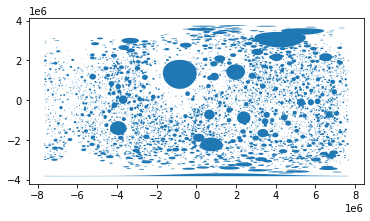

In [ ]:
mercelev.plot()

In [ ]:
mercelev.crs

<Projected CRS: PROJCS["merc-eqc-clon180",GEOGCS["GCS_Mercury_2000 ...>
Name: merc-eqc-clon180
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Equidistant Cylindrical (Spherical)
Datum: <custom>
- Ellipsoid: <custom>
- Prime Meridian: Reference_Meridian

In [ ]:
mercelev["size"] = mercelev.geometry.area

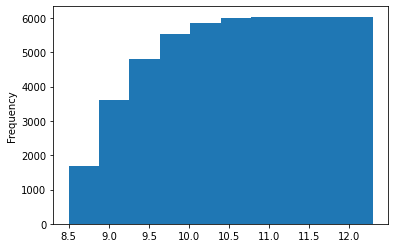

In [ ]:
np.log10(mercelev["size"]).plot(kind="hist", cumulative=True, facecolor=None)

In [ ]:
!wget https://datacatalog.regione.emilia-romagna.it/catalogCTA/dataset/95a47e4f-68a6-4221-aad5-f92d8cd3f3d6/resource/3a5c2c0c-f9cb-463d-b11d-5925a8b42175/download/areepericolositavigentegbe.zip

--2021-04-20 12:26:08--  https://datacatalog.regione.emilia-romagna.it/catalogCTA/dataset/95a47e4f-68a6-4221-aad5-f92d8cd3f3d6/resource/3a5c2c0c-f9cb-463d-b11d-5925a8b42175/download/areepericolositavigentegbe.zip
Resolving datacatalog.regione.emilia-romagna.it (datacatalog.regione.emilia-romagna.it)... 193.43.197.185
Connecting to datacatalog.regione.emilia-romagna.it (datacatalog.regione.emilia-romagna.it)|193.43.197.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410869 (401K) [application/zip]
Saving to: ‘areepericolositavigentegbe.zip.1’

areepericolositavig 100%[===================>] 401.24K   494KB/s    in 0.8s    

2021-04-20 12:26:09 (494 KB/s) - ‘areepericolositavigentegbe.zip.1’ saved [410869/410869]



In [ ]:
!wget https://datacatalog.regione.emilia-romagna.it/catalogCTA/dataset/95a47e4f-68a6-4221-aad5-f92d8cd3f3d6/resource/1765ddae-ccc2-446c-8037-dd35e9c54b96/download/abitatidaconsolidaregbe.zip

--2021-04-20 12:26:25--  https://datacatalog.regione.emilia-romagna.it/catalogCTA/dataset/95a47e4f-68a6-4221-aad5-f92d8cd3f3d6/resource/1765ddae-ccc2-446c-8037-dd35e9c54b96/download/abitatidaconsolidaregbe.zip
Resolving datacatalog.regione.emilia-romagna.it (datacatalog.regione.emilia-romagna.it)... 193.43.197.185
Connecting to datacatalog.regione.emilia-romagna.it (datacatalog.regione.emilia-romagna.it)|193.43.197.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25656 (25K) [application/zip]
Saving to: ‘abitatidaconsolidaregbe.zip.1’

abitatidaconsolidar 100%[===================>]  25.05K  --.-KB/s    in 0.1s    

2021-04-20 12:26:26 (214 KB/s) - ‘abitatidaconsolidaregbe.zip.1’ saved [25656/25656]



In [ ]:
!wget https://datacatalog.regione.emilia-romagna.it/catalogCTA/dataset/95a47e4f-68a6-4221-aad5-f92d8cd3f3d6/resource/1aafb9d6-2640-4eee-b9a9-8c06854e96b3/download/areedaassoggettareaverificavigentegbe.zip

--2021-04-20 12:26:27--  https://datacatalog.regione.emilia-romagna.it/catalogCTA/dataset/95a47e4f-68a6-4221-aad5-f92d8cd3f3d6/resource/1aafb9d6-2640-4eee-b9a9-8c06854e96b3/download/areedaassoggettareaverificavigentegbe.zip
Resolving datacatalog.regione.emilia-romagna.it (datacatalog.regione.emilia-romagna.it)... 193.43.197.185
Connecting to datacatalog.regione.emilia-romagna.it (datacatalog.regione.emilia-romagna.it)|193.43.197.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4780597 (4.6M) [application/zip]
Saving to: ‘areedaassoggettareaverificavigentegbe.zip.1’

areedaassoggettarea 100%[===================>]   4.56M   542KB/s    in 8.8s    

2021-04-20 12:26:37 (530 KB/s) - ‘areedaassoggettareaverificavigentegbe.zip.1’ saved [4780597/4780597]



In [ ]:
!wget https://datacatalog.regione.emilia-romagna.it/catalogCTA/dataset/95a47e4f-68a6-4221-aad5-f92d8cd3f3d6/resource/1694d1fd-bdad-4317-923b-459a7440e200/download/perimetrazioniadbvigente.zip

--2021-04-20 12:26:37--  https://datacatalog.regione.emilia-romagna.it/catalogCTA/dataset/95a47e4f-68a6-4221-aad5-f92d8cd3f3d6/resource/1694d1fd-bdad-4317-923b-459a7440e200/download/perimetrazioniadbvigente.zip
Resolving datacatalog.regione.emilia-romagna.it (datacatalog.regione.emilia-romagna.it)... 193.43.197.185
Connecting to datacatalog.regione.emilia-romagna.it (datacatalog.regione.emilia-romagna.it)|193.43.197.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250674 (245K) [application/zip]
Saving to: ‘perimetrazioniadbvigente.zip.1’

perimetrazioniadbvi 100%[===================>] 244.80K   422KB/s    in 0.6s    

2021-04-20 12:26:38 (422 KB/s) - ‘perimetrazioniadbvigente.zip.1’ saved [250674/250674]



In [ ]:
!unzip perimetrazioniadbvigente.zip

Archive:  perimetrazioniadbvigente.zip
replace Perimetrazioni_AdB_Vigente.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip areepericolositavigentegbe.zip

Archive:  areepericolositavigentegbe.zip
replace aree_pericolosita_Vigente.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip areedaassoggettareaverificavigentegbe.zip

Archive:  areedaassoggettareaverificavigentegbe.zip
replace Aree_da_assoggettare_a_verifica_Vigente.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip abitatidaconsolidaregbe.zip

Archive:  abitatidaconsolidaregbe.zip
  inflating: abitati_da_consolidare.dbf  
  inflating: abitati_da_consolidare.prj  
  inflating: abitati_da_consolidare.sbn  
  inflating: abitati_da_consolidare.sbx  
  inflating: abitati_da_consolidare.shp  
  inflating: abitati_da_consolidare.shp.xml  
  inflating: abitati_da_consolidare.shx  


In [ ]:
emiliaromagna = gpd.read_file("Aree_da_assoggettare_a_verifica_Vigente.shp")
emiliaromagna1 = gpd.read_file("abitati_da_consolidare.shp")
emiliaromagna2 = gpd.read_file("aree_pericolosita_Vigente.shp")
emiliaromagna3 = gpd.read_file("Perimetrazioni_AdB_Vigente.shp")
emiliaromagna.head()

,ENTE,COD_UNION,COD_ADB,Shape_Leng,Shape_Area,geometry
0,PROV_PU,2,Attiva,252.708066,2422.349932,"POLYGON ((2338502.478 4865143.171, 2338496.747..."
1,PROV_PU,2,Attiva,217.275035,2492.105405,"POLYGON ((2340277.924 4864195.744, 2340284.091..."
2,PROV_PU,2,Attiva,255.690474,2773.821410,"POLYGON ((2339971.659 4864720.415, 2339969.573..."
3,PROV_PU,4,Quiescente,251.305078,3214.756415,"POLYGON ((2342818.718 4865830.354, 2342805.319..."
4,PROV_PU,2,Attiva,281.657920,3401.439011,"POLYGON ((2340191.000 4865226.407, 2340200.450..."


(2282190.6719457246, 2348666.183311027, 4836169.554134138, 4884567.349312689)

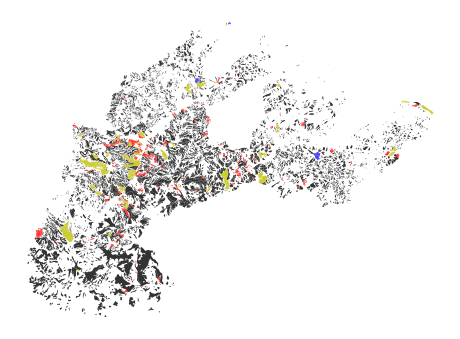

In [ ]:
# https://ambiente.regione.emilia-romagna.it/it/suolo-bacino/sezioni/pianificazione/autorita-bacino-marecchia-conca
# PAI - Bacino Marecchia Conca - Quadro dei dissesti
ax = emiliaromagna.plot(color="k", alpha=0.8, figsize=(8,8)) #Aree_da_assoggettare_a_verifica_Vigente
ax = emiliaromagna1.plot(ax=ax, color="b", alpha=0.8) #abitati_da_consolidare
ax = emiliaromagna2.plot(ax=ax, color="r", alpha=0.8) #aree_pericolosita_Vigente
ax = emiliaromagna3.plot(ax=ax, color="y", alpha=0.8) #Perimetrazioni_AdB_Vigente
ax.axis('off')

In [ ]:
emiliaromagna3.crs

<Projected CRS: EPSG:3004>
Name: Monte Mario / Italy zone 2
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Italy - onshore and offshore - east of 12°E including San Marino and Vatican City State.
- bounds: (12.0, 34.76, 18.99, 47.1)
Coordinate Operation:
- name: Italy zone 2
- method: Transverse Mercator
Datum: Monte Mario
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [ ]:
!wget https://opendata.arcgis.com/datasets/e68ceb0a193e4e378b29255b62ab75e0_0.geojson

--2021-04-20 11:06:41--  https://opendata.arcgis.com/datasets/e68ceb0a193e4e378b29255b62ab75e0_0.geojson
Resolving opendata.arcgis.com (opendata.arcgis.com)... 54.174.206.209, 3.225.243.7, 52.4.39.149, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|54.174.206.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘e68ceb0a193e4e378b29255b62ab75e0_0.geojson’

e68ceb0a193e4e378b2     [           <=>      ] 206.47M  92.2MB/s    in 2.2s    

2021-04-20 11:06:44 (92.2 MB/s) - ‘e68ceb0a193e4e378b29255b62ab75e0_0.geojson’ saved [216502798]



In [ ]:
italy = gpd.GeoDataFrame.from_file("e68ceb0a193e4e378b29255b62ab75e0_0.geojson")

In [ ]:
italy.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
!wget https://github.com/fedhere/MLPNS2021/blob/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip?raw=true

--2021-04-20 12:28:14--  https://github.com/fedhere/MLPNS2021/blob/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/MLPNS2021/raw/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip [following]
--2021-04-20 12:28:14--  https://github.com/fedhere/MLPNS2021/raw/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip [following]
--2021-04-20 12:28:14--  https://raw.githubusercontent.com/fedhere/MLPNS2021/main/OHE/CEDIT_6_5_Friuli_Italy_1976.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githu

In [ ]:
!unzip 'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true'

Archive:  CEDIT_6_5_Friuli_Italy_1976.zip?raw=true
  inflating: CEDIT_6_5_Friuli_Italy_1976.cpg  
  inflating: CEDIT_6_5_Friuli_Italy_1976.dbf  
  inflating: CEDIT_6_5_Friuli_Italy_1976.prj  
  inflating: CEDIT_6_5_Friuli_Italy_1976.sbn  
  inflating: CEDIT_6_5_Friuli_Italy_1976.sbx  
  inflating: CEDIT_6_5_Friuli_Italy_1976.shp  
  inflating: CEDIT_6_5_Friuli_Italy_1976.shp.xml  
  inflating: CEDIT_6_5_Friuli_Italy_1976.shx  


In [ ]:
eq = gpd.read_file("CEDIT_6_5_Friuli_Italy_1976.shp")
eq.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

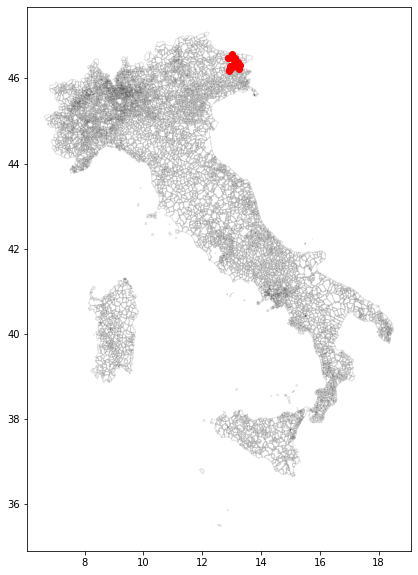

In [ ]:
ax = italy.to_crs(epsg=4326).plot(facecolor="none", edgecolor="k",
                                  figsize=(10,10), alpha=0.1)
eq.plot(color="r", ax=ax)

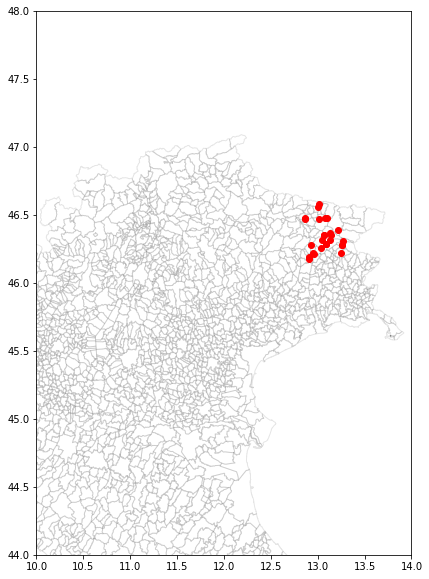

In [ ]:
ax = italy.to_crs(epsg=4326).plot(facecolor="none", edgecolor="k",
                                  figsize=(10,10), alpha=0.1)
eq = gpd.read_file("CEDIT_6_5_Friuli_Italy_1976.shp")
eq.plot(color="r", ax=ax)
ax.set_xlim(10,14)
ax.set_ylim(44,48);

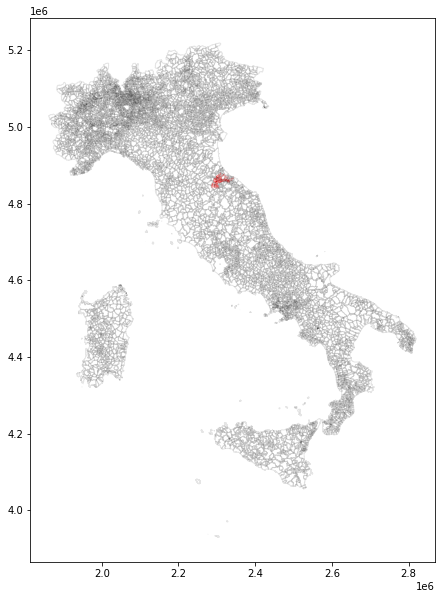

In [ ]:
ax = italy.to_crs(epsg=3004).plot(facecolor="none", edgecolor="k",
                                  figsize=(10,10), alpha=0.1)
ax = emiliaromagna.plot(color="r", ax=ax) #Aree_da_assoggettare_a_verifica_Vigente


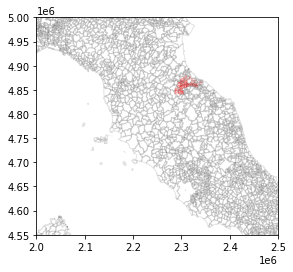

In [ ]:
ax = italy.to_crs(epsg=3004).plot(facecolor="none", edgecolor="k", alpha=0.1)
ax = emiliaromagna.plot(color="r", ax=ax) #Aree_da_assoggettare_a_verifica_Vigente
ax.set_xlim(2*1e6, 2.5*1e6)
ax.set_ylim(4.55*1e6, 5*1e6);
